                                                     LAB-8
                     Implementation of Watershed and Graph cut algorithms for image segmentation

                                                                            Name: Vishwa R
                                                                            Reg. No.: 21BAI1772

Watershed Algorithm

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
img = cv.imread('brain_scan.jpeg')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

(-0.5, 291.5, 171.5, -0.5)

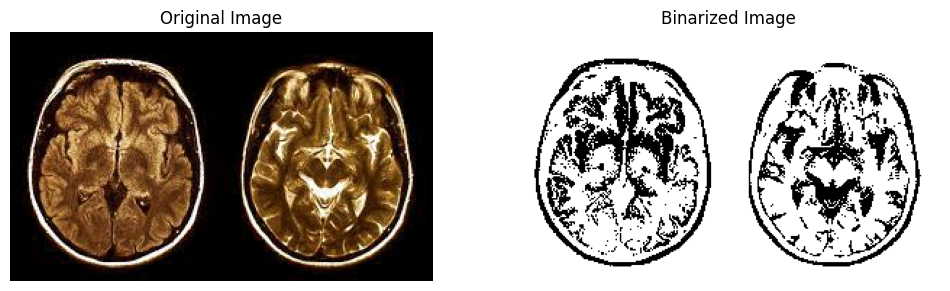

In [3]:

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.subplot(122)
plt.imshow(thresh,cmap='gray')
plt.title("Binarized Image")
plt.axis('off')


In [197]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 1)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=1)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,3)
ret, sure_fg = cv.threshold(dist_transform,0.01*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

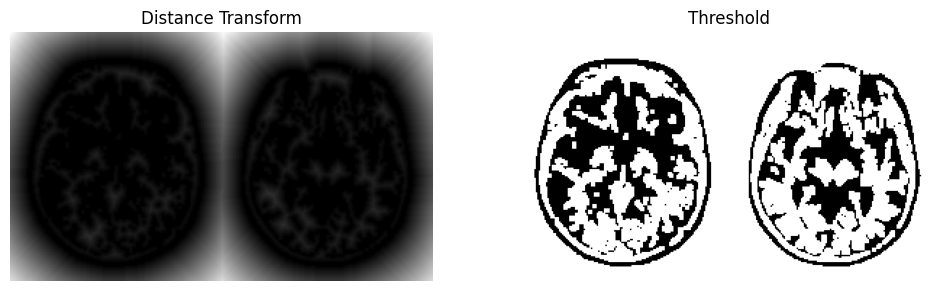

In [198]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(dist_transform,cmap='gray')
plt.title("Distance Transform")
plt.axis('off')
plt.subplot(122)
plt.imshow(sure_fg,cmap='gray')
plt.title("Threshold")
plt.axis('off')
plt.show()

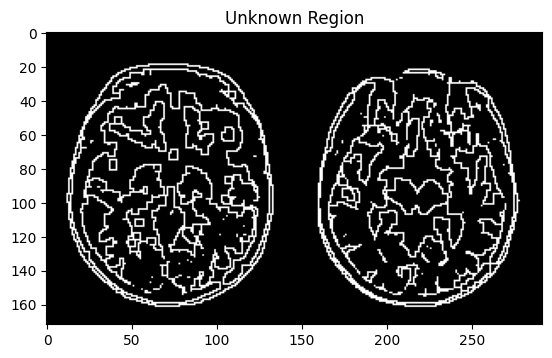

In [199]:
plt.imshow(unknown,cmap='gray')
plt.title("Unknown Region")
plt.show()

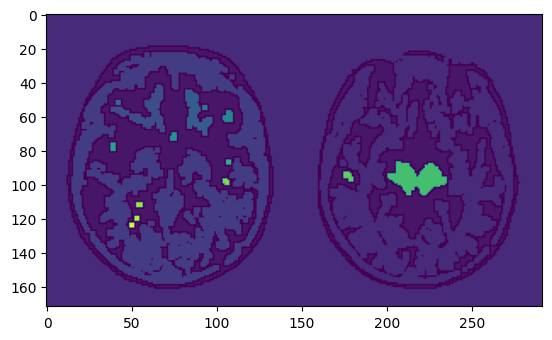

In [200]:
ret,markers=cv.connectedComponents(sure_fg)
markers=markers+1
markers[unknown==255]=0
plt.imshow(markers,cmap='viridis')

In [201]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

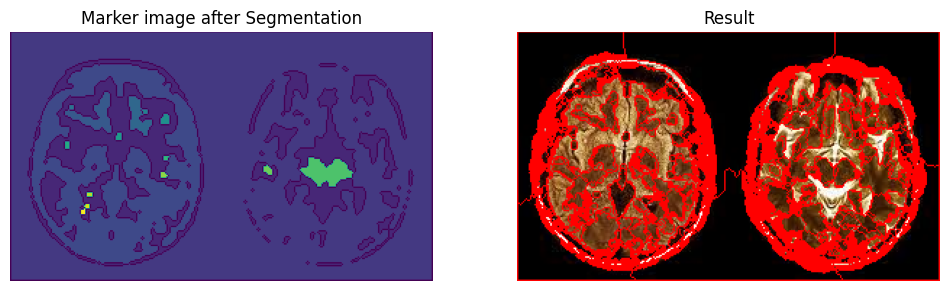

In [202]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(markers,cmap='viridis')
plt.title("Marker image after Segmentation")
plt.axis('off')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title("Result")
plt.axis('off')
plt.show()

**GrabCut Algorithm for Image Segmentation**

In [83]:
image = cv.imread('brain_scan.jpeg') #cat_potrait.jpg
image.shape

(172, 292, 3)

In [84]:
mask = np.zeros(image.shape[:2], np.uint8)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)

In [95]:
rectangle = (12, 20, 300, 260) # (start_x, start_y, width, height)  (120, 40, 340, 430)

In [96]:
cv.grabCut(image, mask, rectangle, backgroundModel, foregroundModel,3, cv.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2]], dtype=uint8),
 array([[5.87180048e-01, 5.18486108e-02, 2.62524612e-04, 3.59964997e-01,
         7.43819733e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         6.32675105e+01, 4.08767932e+01, 2.70084388e+01, 2.38666667e+02,
         2.15333333e+02, 2.09000000e+02, 6.33621004e+00, 2.18086787e+00,
         2.04242130e+00, 1.86823529e+02, 1.62588235e+02, 1.53764706e+02,
         1.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.00000000e-02, 1.30511747e+03, 1.24948022e+03, 1.04816061e+03,
         1.24948022e+03, 1.29416204e+03, 1.12767952e+03, 1.04816061e+03,
         1.12767952e+03, 1.10062778e+03, 1.56222222e+02, 1.73444444e+02,
         1.71166667e+02, 1.73444444e+02, 2.0

In [97]:
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

In [98]:
image_segmented = image * mask2[:, :, np.newaxis]

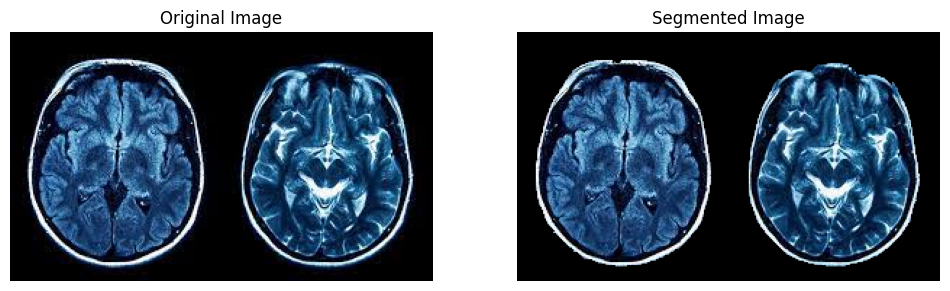

In [99]:
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(cv.cvtColor(image_segmented, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

After trying with different rectangle measures, (120, 40, 340, 430) seems to work the best for this image to segment the cat from the Background.